In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/kashyap/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/kashyap/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/kashyap/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/kashyap/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/kashyap/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to
[nltk_data]

[nltk_data]    |   Package ppattach is already up-to-date!
[nltk_data]    | Downloading package problem_reports to
[nltk_data]    |     /home/kashyap/nltk_data...
[nltk_data]    |   Package problem_reports is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     /home/kashyap/nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     /home/kashyap/nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package propbank to
[nltk_data]    |     /home/kashyap/nltk_data...
[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     /home/kashyap/nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package ptb to /home/kashyap/nltk_data...
[nltk_data]    |   Package ptb is alre

True

In [2]:
!dvc config core.autostage true

/bin/bash: line 1: dvc: command not found


In [3]:
!dvc init -f

/bin/bash: line 1: dvc: command not found


In [6]:
data = pd.read_csv("emails.csv")

In [7]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [8]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [10]:
data.groupby("spam").count()

,text
spam,
0,4360
1,1368


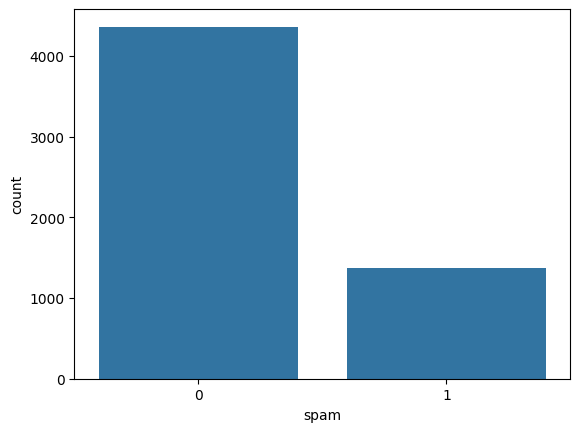

In [11]:
sns.countplot(x='spam',data=data)
plt.show()

In [12]:
def text_processing(text):
    # Convert text to lowercase
    text = text.lower()

    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    text = nltk.word_tokenize(text)

    y = []
    for token in text:
        if token not in nltk.corpus.stopwords.words('english'):
            y.append(token)
    
    return " ".join(y[1:])


In [13]:
data["after_token"] = data.apply(lambda row: text_processing(row['text']), axis = 1) 

In [14]:
data

,text,spam,after_token
0,Subject: naturally irresistible your corporate...,1,naturally irresistible corporate identity lt r...
1,Subject: the stock trading gunslinger fanny i...,1,stock trading gunslinger fanny merrill muzo co...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting sh...
3,Subject: 4 color printing special request add...,1,4 color printing special request additional in...
4,"Subject: do not have money , get software cds ...",1,money get software cds software compatibility ...
...,...,...,...
5723,Subject: re : research and development charges...,0,research development charges gpg forwarded shi...
5724,"Subject: re : receipts from visit jim , than...",0,receipts visit jim thanks invitation visit lsu...
5725,Subject: re : enron case study update wow ! a...,0,enron case study update wow day super thank mu...
5726,"Subject: re : interest david , please , call...",0,interest david please call shirley crenshaw as...


In [15]:
from wordcloud import WordCloud

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')


In [16]:
data[data['spam'] == 1]['after_token']

0       naturally irresistible corporate identity lt r...
1       stock trading gunslinger fanny merrill muzo co...
2       unbelievable new homes made easy im wanting sh...
3       4 color printing special request additional in...
4       money get software cds software compatibility ...
                              ...                        
1363    ready get hello viagra 1 med struggle mens ere...
1364    would like 250 gas card let current high price...
1365    immediate reply needed dear sir dr james alabi...
1366    wan na see get fisted fist bang show everythin...
1367    hot stock info drgv announces another press re...
Name: after_token, Length: 1368, dtype: object

Text(0.5, 1.0, 'Spam email Word cloud')

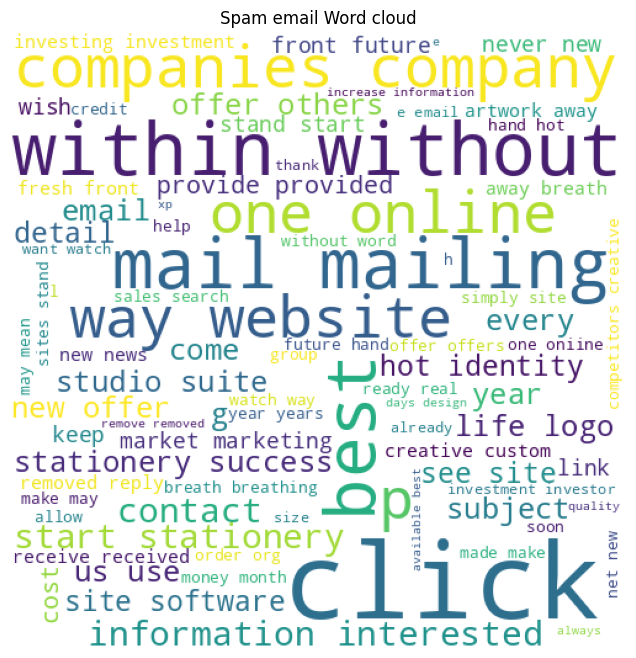

In [17]:
l = ''
for i in data[data["spam"] == 1]["after_token"]:
    u = np.unique(np.array(i.split()))
    for j in u:
        l = l + j + " "

spam_wc = wc.generate(l)

plt.figure(figsize = (15,8))
plt.imshow(spam_wc)
plt.axis("off")
plt.title("Spam email Word cloud")


Text(0.5, 1.0, 'ham email Word cloud')

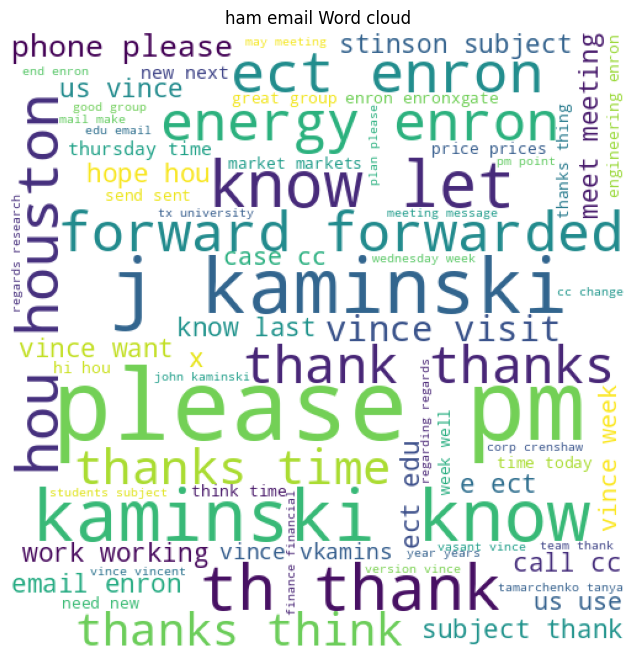

In [18]:
l = ''
for i in data[data["spam"] == 0]["after_token"]:
    u = np.unique(np.array(i.split()))
    for j in u:
        l = l + j + " "

ham_wc = wc.generate(l)

plt.figure(figsize = (15,8))
plt.imshow(ham_wc)
plt.axis("off")
plt.title("ham email Word cloud")


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test_valid, y_train, y_test_valid = train_test_split(data['after_token'], data['spam'], stratify = data['spam'], train_size = 0.7, random_state = 230)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_valid, y_test_valid, stratify = y_test_valid, train_size = 0.5, random_state = 201)



In [54]:
X_train = X_train.reset_index(drop = True)
X_valid = X_valid.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_valid = y_valid.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [55]:
train_dataset = pd.DataFrame()
train_dataset['Preprocessed_text'] = X_train
train_dataset['Spam'] = y_train

test_dataset = pd.DataFrame()
test_dataset['Preprocessed_text'] = X_test
test_dataset['Spam'] = y_test

valid_dataset = pd.DataFrame()
valid_dataset['Preprocessed_text'] = X_valid
valid_dataset['Spam'] = y_valid

In [56]:
train_dataset.to_csv('train.csv', index = False)
test_dataset.to_csv('test.csv', index = False)
valid_dataset.to_csv('validation.csv', index = False)


In [57]:
!dvc add train.csv validation.csv test.csv

⠋ Checking graph                                       core>
  0% Adding...|                          | train.csv |0/3 [00:00<?,     ?file/s]
!
                                                                                
!
  0% Checking cache in '/home/kashyap/AML Assignments/AML_Assignment2/.dvc/cache
                                                                                
!
  0%|          |Checking out /home/kashyap/AML Assignm0/1 [00:00<?,    ?files/s]
  0% Adding...|                     | validation.csv |0/3 [00:00<?,     ?file/s]
!
                                                                                
!
  0% Checking cache in '/home/kashyap/AML Assignments/AML_Assignment2/.dvc/cache
                                                                                
!
  0%|          |Checking out /home/kashyap/AML Assignm0/1 [00:00<?,    ?files/s]
  0% Adding...|                           | test.csv |0/3 [00:00<?,     ?file/s]
!
                                  

In [58]:
!dvc commit -f

In [59]:
pd.read_csv('train.csv')

,Preprocessed_text,Spam
0,new computers hi lyn hope things going better ...,0
1,contstraints shape smile stinson vince zimin b...,0
2,tropical cyclones dear yesterday mentioned vin...,0
3,university texas conference energy finance feb...,0
4,sokolov eis expenses hi kevin office thursday ...,0
...,...,...
4004,anticipated assistant required mr ike ejoh ban...,1
4005,houston research opportunity dear vince would ...,0
4006,frank thanks given name employee energy power ...,0
4007,monte carlo techniques zimin course descriptio...,0


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test_valid, y_train, y_test_valid = train_test_split(data['after_token'], data['spam'], stratify = data['spam'], train_size = 0.7, random_state = 752)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_valid, y_test_valid, stratify = y_test_valid, train_size = 0.5, random_state = 456)



In [61]:
X_train = X_train.reset_index(drop = True)
X_valid = X_valid.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_valid = y_valid.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [62]:
train_dataset = pd.DataFrame()
train_dataset['Preprocessed_text'] = X_train
train_dataset['Spam'] = y_train

test_dataset = pd.DataFrame()
test_dataset['Preprocessed_text'] = X_test
test_dataset['Spam'] = y_test

valid_dataset = pd.DataFrame()
valid_dataset['Preprocessed_text'] = X_valid
valid_dataset['Spam'] = y_valid

In [63]:
train_dataset.to_csv('train.csv', index = False)
test_dataset.to_csv('test.csv', index = False)
valid_dataset.to_csv('validation.csv', index = False)


In [64]:
!dvc add train.csv validation.csv test.csv

⠋ Checking graph                                       core>
  0% Adding...|                          | train.csv |0/3 [00:00<?,     ?file/s]
!
                                                                                
!
  0% Checking cache in '/home/kashyap/AML Assignments/AML_Assignment2/.dvc/cache
                                                                                
!
  0%|          |Adding train.csv to cache             0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /home/kashyap/AML Assignm0/1 [00:00<?,    ?files/s]
  0% Adding...|                     | validation.csv |0/3 [00:00<?,     ?file/s]
!
                                                                                
!
  0% Checking cache in '/home/kashyap/AML Assignments/AML_Assignment2/.dvc/cache
                                                                                
!
  0%|          |Adding validation.

In [31]:
!dvc commit -f

In [65]:
pd.read_csv('train.csv')

,Preprocessed_text,Spam
0,analyst candidate mitra mujica mitra mujica ac...,0
1,approval overdue access request paul thomas en...,0
2,giuseppe cell phone stinson problem vince stin...,0
3,2000 expenses know deadline 2000 invoices ap f...,0
4,houston trip extended rental apartment 20 th n...,0
...,...,...
4004,howard lawrence vince hey vince picture howard...,0
4005,custom logos identities us thinking breathing ...,1
4006,reactions september live line reactions latest...,0
4007,vince kaminski discussion notes enterprise wid...,0


In [66]:
!dvc checkout train.csv -f

Building workspace index                              |1.00 [00:00, 60.2entry/s]
Comparing indexes                                    |2.00 [00:00, 1.73kentry/s]
Applying changes                                      |0.00 [00:00,     ?file/s]


In [67]:
pd.read_csv('train.csv')

,Preprocessed_text,Spam
0,analyst candidate mitra mujica mitra mujica ac...,0
1,approval overdue access request paul thomas en...,0
2,giuseppe cell phone stinson problem vince stin...,0
3,2000 expenses know deadline 2000 invoices ap f...,0
4,houston trip extended rental apartment 20 th n...,0
...,...,...
4004,howard lawrence vince hey vince picture howard...,0
4005,custom logos identities us thinking breathing ...,1
4006,reactions september live line reactions latest...,0
4007,vince kaminski discussion notes enterprise wid...,0


In [68]:
 !dvc checkout train.csv

Building workspace index                              |1.00 [00:00,  217entry/s]
Comparing indexes                                    |2.00 [00:00, 1.70kentry/s]
Applying changes                                      |0.00 [00:00,     ?file/s]


In [69]:
pd.read_csv('train.csv')

,Preprocessed_text,Spam
0,analyst candidate mitra mujica mitra mujica ac...,0
1,approval overdue access request paul thomas en...,0
2,giuseppe cell phone stinson problem vince stin...,0
3,2000 expenses know deadline 2000 invoices ap f...,0
4,houston trip extended rental apartment 20 th n...,0
...,...,...
4004,howard lawrence vince hey vince picture howard...,0
4005,custom logos identities us thinking breathing ...,1
4006,reactions september live line reactions latest...,0
4007,vince kaminski discussion notes enterprise wid...,0


In [74]:
!dvc artifacts --help

usage: dvc artifacts [-h] [-q | -v] {get} ...

DVC model registry artifact commands.
Documentation: <https://man.dvc.org/artifacts>

positional arguments:
  {get}          Use `dvc artifacts CMD --help` to display command-specific
                 help.
    get          DVC model registry artifact commands.

options:
  -h, --help     show this help message and exit
  -q, --quiet    Be quiet.
  -v, --verbose  Be verbose.
